In [1]:
# 1.0 Call libraries:

import pandas as pd
from  pathlib import Path

# 1.0.1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 1.0.2
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, f1_score

In [5]:
# 2.0 Read the data
data = pd.read_csv('/Users/himanikathait/Downloads/covid_data.csv')

In [6]:
# 2.1 Show data:

data.shape   
data.head()

,Continent,Country,Population,Cases_New,Cases_Active,Cases_Critical,Cases_Recovered,Cases_1M_pop,Cases_Total,Deaths_New,Deaths_1M_pop,Deaths_Total,Tests_1M_pop,Tests_Total,Day,Time
0,North-America,Anguilla,15230.0,NaN,13.0,4.0,3879.0,256336.0,3904,NaN,788.0,12.0,3373736.0,51382.0,07/07/23,2023-07-07T17:30:09+00:00
1,North-America,Saint-Pierre-Miquelon,5759.0,NaN,1001.0,1.0,2449.0,599410.0,3452,NaN,347.0,2.0,4410488.0,25400.0,07/07/23,2023-07-07T17:30:09+00:00
2,Africa,Saint-Helena,6115.0,NaN,2164.0,NaN,2.0,354211.0,2166,NaN,NaN,NaN,NaN,NaN,07/07/23,2023-07-07T17:30:09+00:00
3,South-America,Falkland-Islands,3539.0,NaN,0.0,NaN,1930.0,545352.0,1930,NaN,NaN,NaN,2439107.0,8632.0,07/07/23,2023-07-07T17:30:09+00:00
4,North-America,Montserrat,4965.0,NaN,19.0,NaN,1376.0,282578.0,1403,NaN,1611.0,8.0,3577442.0,17762.0,07/07/23,2023-07-07T17:30:09+00:00


In [7]:
df = data.dropna()

In [16]:
# 2.2 Select subset of predictors:

cols_to_use = ['Population', 'Cases_New', 'Cases_Active', 'Cases_Recovered']
X = df[cols_to_use]

# 2.3 Select target
y = df.Deaths_Total

# 2.4 Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
# 3.0
my_model = XGBRegressor()
my_model.fit(X_train, y_train, verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 3.1 Predictions:

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 27663.92626953125


In [20]:
# 3.2 Set n_estimators:

my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [21]:
# 3.3 Set early stop rounds:

my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose= True)

[0]	validation_0-rmse:15611.06630
[1]	validation_0-rmse:24154.09084
[2]	validation_0-rmse:32061.17789
[3]	validation_0-rmse:31984.35556
[4]	validation_0-rmse:32126.00074


/Users/himanikathait/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
# 3.4 learning_rate:

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose= True)

[0]	validation_0-rmse:12097.26639
[1]	validation_0-rmse:12031.13912
[2]	validation_0-rmse:12349.33506
[3]	validation_0-rmse:12988.29150
[4]	validation_0-rmse:13873.23039
[5]	validation_0-rmse:14934.30362


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
# n_jobs:

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose= True)

[0]	validation_0-rmse:12097.26639
[1]	validation_0-rmse:12031.13912
[2]	validation_0-rmse:12349.33506
[3]	validation_0-rmse:12988.29150
[4]	validation_0-rmse:13873.23039
[5]	validation_0-rmse:14934.30362
[6]	validation_0-rmse:16114.35608


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 10592.792938232422


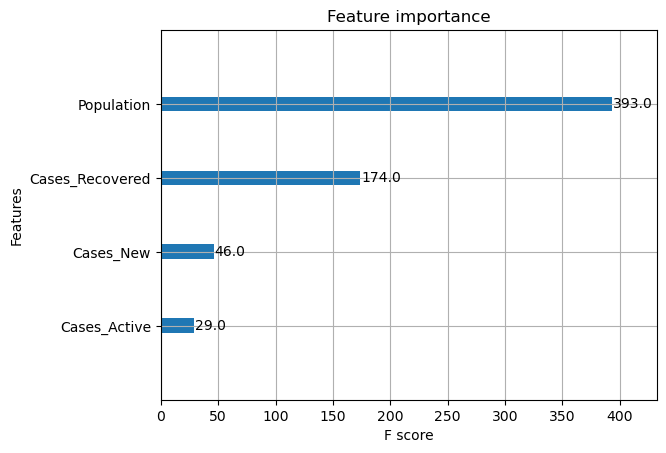

In [31]:
import matplotlib.pyplot as plt
my_model = xgb.XGBRegressor()
my_model.fit(X_train, y_train)

xgb.plot_importance(my_model)
plt.show()

Analysis and Interpretation

# Objective
Predicting the number of deaths based on different predictors (features) including population, new cases, active cases, and recovered cases by performing regression analysis with the XGBoost algorithm.

# Brief
•	The code shows how to train an XGBoost regression model in a variety of ways, including defining hyperparameters, early halting, modifying learning rates, and using multiple cores. The main goal is to create a model that correctly forecasts the number of deaths using the information provided as predictor variables. The model's performance is evaluated using evaluation measures like MAE and early halting.

•	Selecting predictors and target: We took a subset of predictors ('Population', 'CasesNew', 'CasesActive', 'CasesRecovered') and assigned them to the variable X.
The target variable ('DeathsTotal') is assigned to the variable y.

•	Early stopping: Early stopping is implemented to prevent overfitting. The early stopping_rounds parameter specifies that if the model's performance on the validation set (X_valid, y_valid) doesn't improve for 5 consecutive rounds, the training will stop.

# Outcome
The model's predictions are made on the validation data (X_valid) and compared to the actual target values (y_valid). The mean absolute error (MAE) is calculated and printed, which provides an indication of how well the model's predictions match the actual values. The MAE value, 12685.271606445312 represents the average absolute difference between the predicted number of deaths and the actual number of deaths across the validation set.
